# **Chapter 3**
This notebook walkthrough the cleaning and exploring process of our arabic tweets dataset

In [2]:
!pip install python-bidi
!pip install arabic_reshaper
!pip install wordcloud
!pip install emoji
!pip install nltk
!pip install tashaphyne
# !pip install gensim

     |████████████████████████████████| 51kB 1.8MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=7040d5755c70e53877d5b9602cc7ea2b685771278079f9e0f9bc459e0340b086
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
     |████████████████████████████████| 245kB 2.8MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.6-cp36-none-any.whl size=106208 sha256=dab150ba46fa66ed2014b2af2cacb79420ae8734e627f73bc1d8bc9b742f034c
  Stored in directory: /root/.cache/pip/wheels/34/b5/2d/668d567e8c2b6f10309dbfaba5bfef6ea0b1c0f9f6fb37078f
Successfully built pyarabic


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from IPython.display import display

import utils


# FONT_PATH = os.environ.get("FONT_PATH", "/Library/Fonts/Times New Roman.ttf")
# path = './labeld_dataset/'

import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Cleaning and EDA

In [ ]:
# sys.path.insert(0, path)

In [ ]:
bolivard = pd.read_csv('/content/drive/My Drive/Colab Notebooks/grad_pr/bolivard.csv', header=0)
winter = pd.read_csv('/content/drive/My Drive/Colab Notebooks/grad_pr/winter_wounder_land.csv', header=None)
shm = pd.read_csv('/content/drive/My Drive/Colab Notebooks/grad_pr/labeled shm3.csv', header=0)

In [7]:
display(shm.loc[:, shm.columns != 'user-name'].head(n=3))
display(bolivard.head(n=3))
display(winter.head(n=3))

,Unnamed: 0,date,label,tweet,loca,fv_count,rt-count,Event name
0,31,2019-11-06 15:43:30,2.0,ابو ناصر طلبتك ...المفروض تكون ليلة لك كليلة ع...,جدة,0.0,0.0,SHM
1,32,2019-11-06 15:43:07,2.0,ليلة سهم على اي قناه عرضوها امس؟,NaN,0.0,0.0,SHM
2,108,2019-11-06 15:01:00,2.0,#ليلة_سهم\nالليلة بشكل عام جميلة .. بس الكراسي...,الرياض,0.0,0.0,SHM


,date,label,text,event
0,2019-10-19 15:06:03,0,#بوليفارد_الرياض وصار للعوائل فقط😂😂,carnival_bolivard
1,2019-10-19 15:05:17,1,@RiyadhSeason ودنا #بوليفارد_الرياض يكون متواج...,carnival_bolivard
2,2019-10-19 15:02:51,1,أغلبنا تضايق من زحمة #بوليفارد_الرياض والمناظر...,carnival_bolivard


,0,1,2
0,2019-10-26 20:14:04,اللعبة هذي في #ونتر_وندرلاند اليوم\n\nاخيرا ج...,NaN
1,2019-10-26 20:13:28,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,1
2,2019-10-26 20:12:23,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,2


In [8]:
winter.columns = ['date', 'text', 'label']
print(shm.columns)

Index(['Unnamed: 0', 'date', 'label', 'tweet', 'user-name', 'loca', 'fv_count',
       'rt-count', 'Event name'],
      dtype='object')


In [ ]:

shm.drop('Unnamed: 0', inplace=True, axis=1)
shm.rename(columns={'tweet': 'text'}, inplace=True)


In [10]:
print(shm.columns)
print(winter.columns)

Index(['date', 'label', 'text', 'user-name', 'loca', 'fv_count', 'rt-count',
       'Event name'],
      dtype='object')
Index(['date', 'text', 'label'], dtype='object')


In [ ]:
winter['event'] = 'winter_wonder_land'
shm['event'] = 'shm'
shm.drop('Event name', inplace=True, axis=1)

In [12]:
print(f'Shm event labeld tweets {shm.label.notna().sum()}\nwinter event labeld tweets {winter.label.notna().sum()}\nbolivard event labeld tweets {bolivard.label.notna().sum()}')

Shm event labeld tweets 1548
winter event labeld tweets 1480
bolivard event labeld tweets 2001


In [ ]:
shm = shm[shm.label.notna()]

winter = winter[winter.label.notna()]



In [14]:
print(shm.label.value_counts())

print('\n', winter.label.value_counts())

print('\n',bolivard.label.value_counts())

1.0    1387
0.0     128
2.0      33
Name: label, dtype: int64

 1    703
2    490
0    285
       2
Name: label, dtype: int64

 1    1240
0     533
2     228
Name: label, dtype: int64


In [ ]:
winter = winter[winter.label != ' ']

In [ ]:
shm.label = shm.label.astype('int64')

In [17]:
print(shm.shape)
print(winter.shape)
print(bolivard.shape)

(1548, 8)
(1478, 4)
(2001, 4)


In [33]:
merged = pd.concat([winter, bolivard, shm])
merged.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [34]:
display(merged.head(n=15))
print(merged.shape)

,date,event,fv_count,label,loca,rt-count,text,user-name
0,2019-10-26 20:13:28,winter_wonder_land,NaN,1,NaN,NaN,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,NaN
1,2019-10-26 20:12:23,winter_wonder_land,NaN,2,NaN,NaN,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,NaN
2,2019-10-26 20:09:44,winter_wonder_land,NaN,2,NaN,NaN,حد يعرف سعر الالعاب في ونتر وندر لاند ؟!!\n #م...,NaN
3,2019-10-26 20:08:12,winter_wonder_land,NaN,2,NaN,NaN,@KAldeehani @MQA707 لا صح اسمها ونتر وندرلاند,NaN
4,2019-10-26 20:05:38,winter_wonder_land,NaN,1,NaN,NaN,@Turki_alalshikh اليوم زرت #ونتر_وندرلاند مع ا...,NaN
5,2019-10-26 20:04:07,winter_wonder_land,NaN,2,NaN,NaN,تدرين ليه المطر يشتاق لك يالرياض\nمن بين كل ال...,NaN
6,2019-10-26 20:03:19,winter_wonder_land,NaN,1,NaN,NaN,#موسم_الرياض فيه مطاعم ألعاب نارية النافورة، ا...,NaN
7,2019-10-26 20:00:18,winter_wonder_land,NaN,1,NaN,NaN,سينما على الأجواء المفتوحة وياسلام سلم🌃 \nمن ق...,NaN
8,2019-10-26 19:48:44,winter_wonder_land,NaN,1,NaN,NaN,نصيحتي له لا تشيلو ونتر وندرلاند خلو عندنا وحد...,NaN
9,2019-10-26 19:48:20,winter_wonder_land,NaN,0,NaN,NaN,ماطلبنا شي مستحيل ولا شي باذخ مثل #ونتر_وندرلا...,NaN


(5027, 8)


In [ ]:
merged.label  = pd.to_numeric(merged.label)

In [36]:
merged.label.value_counts()

1    3330
0     946
2     751
Name: label, dtype: int64

In [ ]:
merged.label = merged['label'].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

In [114]:
frequent_words = utils.frequent_words(merged.text, topk=25)
frequent_words

الرياض        2851
سهم           1646
موسم          1636
ونتر          1407
وندرلاند      1400
ليلة          1379
مسيره          947
بوليفارد       657
ليله           398
اليوم          239
مسيرة          206
شكرا           202
اروح           164
رابح           119
الزحمه         110
البوليفارد     103
الناس          103
جميل           101
صار            100
تركي           100
زحمه            98
الترفيه         95
احلى            95
اجمل            86
عبدالمجيد       84
dtype: int64

In [115]:
pos_frequ_words = utils.frequent_words(merged[merged.label == 'Positive'].text, topk=25)
pos_frequ_words

الرياض        1898
سهم           1476
ليلة          1277
موسم          1116
ونتر           689
وندرلاند       689
مسيره          638
ليله           339
بوليفارد       333
شكرا           193
اليوم          172
مسيرة          169
رابح           116
اروح           105
احلى            92
جميل            90
صار             86
اجمل            83
عبدالمجيد       80
جبار            76
صقر             74
تركي            73
الترفيه         73
ماجد            68
البوليفارد      67
dtype: int64

In [116]:
neg_frequ_words = utils.frequent_words(merged[merged.label == 'Negative'].text, topk=25)
neg_frequ_words

الرياض        586
موسم          382
مسيره         267
ونتر          257
وندرلاند      255
بوليفارد      157
سهم           131
ليلة           77
زحمه           61
الزحمه         52
تنظيم          48
زحمة           47
ليله           45
الزحمة         36
الناس          34
اليوم          31
مسيرة          30
اروح           26
التنظيم        24
البوليفارد     21
الحين          20
يارب           19
ونعم           19
وين            19
الوكيل         19
dtype: int64

In [117]:
neu_frequ_words = utils.frequent_words(merged[merged.label == 'Neutral'].text, topk=25)
neu_frequ_words

ونتر          461
وندرلاند      456
الرياض        367
بوليفارد      167
موسم          138
مسيره          42
سهم            39
اليوم          36
الزحمه         35
اروح           33
زحمه           30
تذاكر          26
الناس          26
ليلة           25
الزحمة         24
الحين          20
زحمة           19
علي            18
راح            17
الالعاب        17
سباق           16
البوليفارد     15
الهلال         15
ليله           14
النصر          13
dtype: int64

In [ ]:
combind = ' '.join(frequent_words.index)

In [119]:
data = arabic_reshaper.reshape(combind)
data = get_display(data)
data = data.split()
data.reverse()
print(data)

['ﺽﺎﻳﺮﻟﺍ', 'ﻢﻬﺳ', 'ﻢﺳﻮﻣ', 'ﺮﺘﻧﻭ', 'ﺪﻧﻻﺭﺪﻧﻭ', 'ﺔﻠﻴﻟ', 'ﻩﺮﻴﺴﻣ', 'ﺩﺭﺎﻔﻴﻟﻮﺑ', 'ﻪﻠﻴﻟ', 'ﻡﻮﻴﻟﺍ', 'ﺓﺮﻴﺴﻣ', 'ﺍﺮﻜﺷ', 'ﺡﻭﺭﺍ', 'ﺢﺑﺍﺭ', 'ﻪﻤﺣﺰﻟﺍ', 'ﺩﺭﺎﻔﻴﻟﻮﺒﻟﺍ', 'ﺱﺎﻨﻟﺍ', 'ﻞﻴﻤﺟ', 'ﺭﺎﺻ', 'ﻲﻛﺮﺗ', 'ﻪﻤﺣﺯ', 'ﻪﻴﻓﺮﺘﻟﺍ', 'ﻰﻠﺣﺍ', 'ﻞﻤﺟﺍ', 'ﺪﻴﺠﻤﻟﺍﺪﺒﻋ']


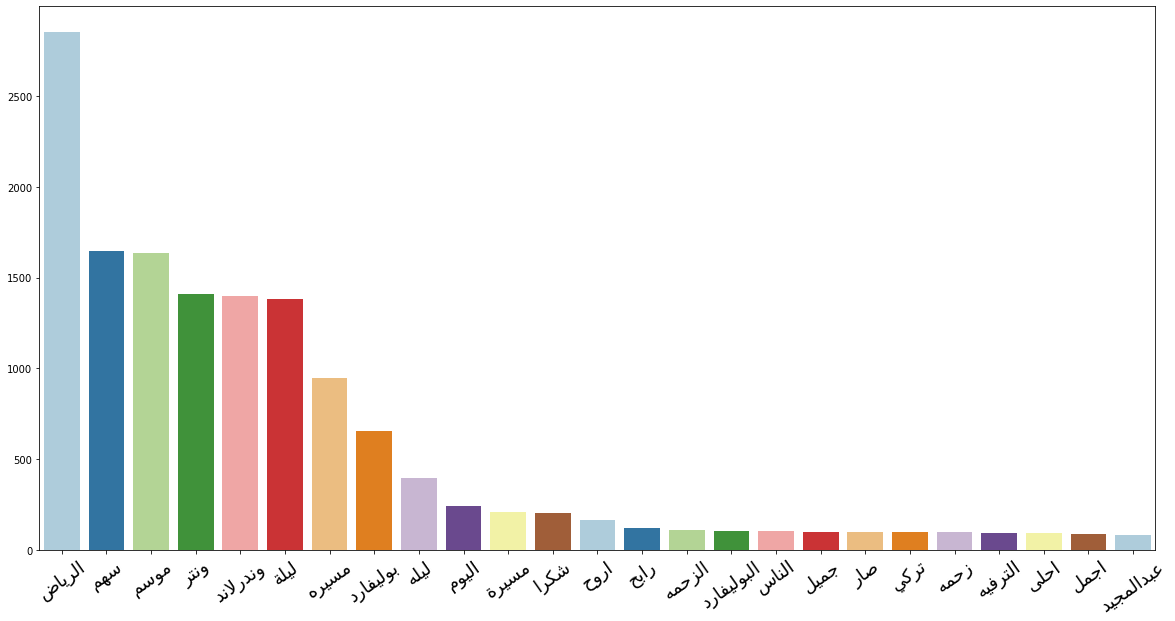

In [120]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data, frequent_words.values, palette="Paired")


for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(18)
                tick.label.set_rotation(35)
plt.savefig('term_frequency_all_data.png')
plt.show()

In [ ]:
pos_emojies = utils.view_emojie(merged[merged.label == 'Positive'].text)
neg_emojies = utils.view_emojie(merged[merged.label == 'Negative'].text)

In [122]:
print(pos_emojies)
print(neg_emojies)

0         
1         
2         
3       🌃😏
4         
        ..
3325      
3326      
3327     😍
3328     💔
3329     💙
Length: 3330, dtype: object
0        
1        
2        
3        
4        
       ..
941      
942      
943      
944    🎼🖤
945      
Length: 946, dtype: object


In [ ]:
pos_emojies = pos_emojies.replace(r'^\s*$', np.nan, regex=True) # replace empty space with nan .. 
pos_emojies.dropna(inplace=True)

neg_emojies = neg_emojies.replace(r'^\s*$', np.nan, regex=True) 
neg_emojies.dropna(inplace=True)

In [124]:
display(pos_emojies.value_counts())

display(neg_emojies.value_counts())

❤         117
😍          93
💔          76
💙          66
♥          47
         ... 
❤❤❤❤❤🌿      1
💔💔🥺         1
😥❤❤         1
🌟           1
☹❤❤❤        1
Length: 963, dtype: int64

💔       17
😂       14
🙂       10
😷        6
😩        6
        ..
🖐        1
😫😫😫😫     1
😰😤🤬      1
🥴😩🤮      1
😬        1
Length: 148, dtype: int64

In [ ]:
pos_arr = []
neg_arr = []
for pos_row, neg_row in zip(pos_emojies, neg_emojies):
    for p_item, n_item  in zip(pos_row, neg_row):
        pos_arr.append(p_item)
        neg_arr.append(n_item)
     
pos_emojies = pd.Series(pos_arr)  
neg_emojies = pd.Series(neg_arr)      

In [126]:
display(pos_emojies.value_counts()[:10])
# display(pos_emojies.value_counts()[-7:])
pos_emojies.value_counts()[:10].to_csv('postive_emojies.csv', index=True)

😍    66
😭    43
❤    29
💔    24
😂    13
🥺    12
♥    10
💙     9
🔥     8
🎡     6
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
display(neg_emojies.value_counts()[:10])
# display(neg_emojies.value_counts()[-7:])
neg_emojies.value_counts()[:10].to_csv('negative_emojies.csv', index=True)

💔    50
😂    30
😭    23
🙂    20
🏻    12
😷    10
😡    10
🤢     9
😩     8
❤     8
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cleaned = utils.get_arabic_words(merged.text, handle_emojies='remove', remove_repeated_char=True)

In [129]:
flagged = utils.repeated_char(merged.text)
flagged = flagged.replace(r'^\s*$', np.nan, regex=True)
flagged[flagged.notna()]

30                تفوووتك
46              ابداااااع
52      ههههههههههههههههه
62              انجاززززز
91            وكوووووووبه
              ...        
4973             اوووووفر
4977               عيبببب
4978               جددددا
5003       خلاااااااااااص
5022          مستحييييييل
Length: 671, dtype: object

In [ ]:
# combind = ' '.join(cleaned)

In [ ]:
# data = arabic_reshaper.reshape(combind)
# data = get_display(data)

In [ ]:
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [ ]:
# wordcloud.to_file('word_cloud_black.png')

In [ ]:
# plt.figure(figsize = (25, 25)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.tight_layout() 
# plt.show()

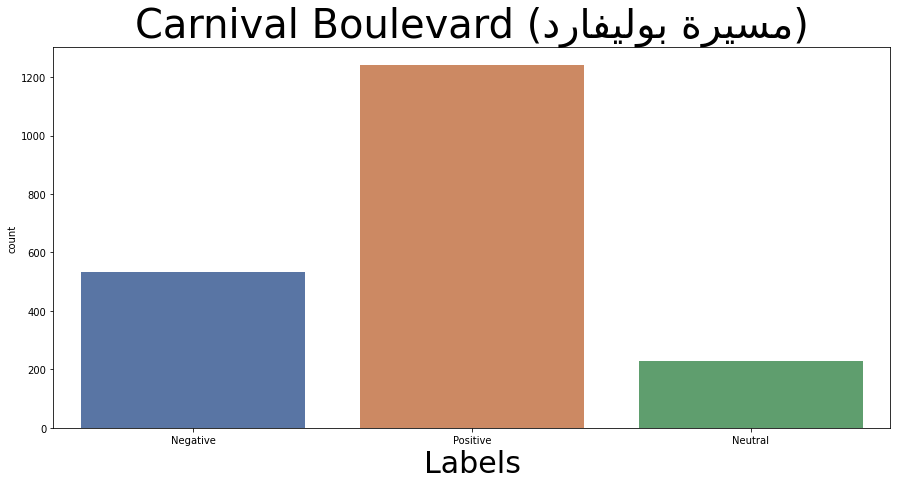

In [135]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(merged[merged.event=='carnival_bolivard'].label, palette='deep')
event = 'مسيرة بوليفارد'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'Carnival Boulevard ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('carnival_boulevard.png')

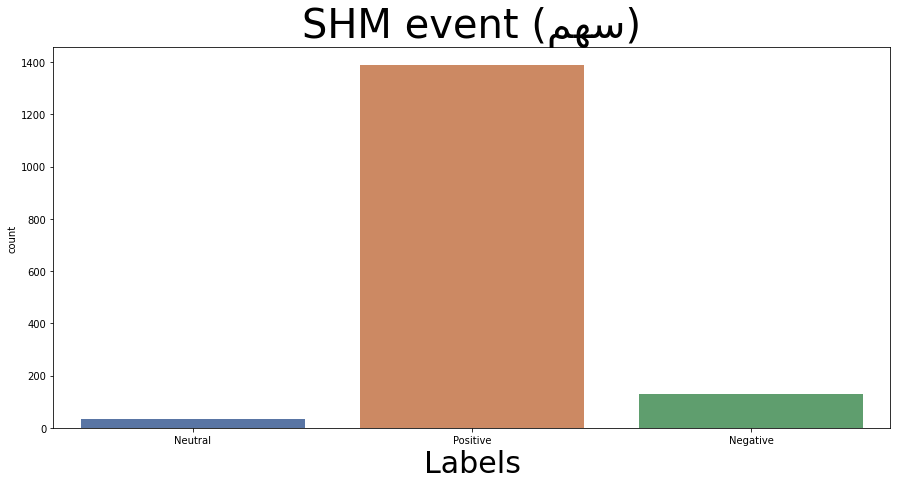

In [136]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged[merged.event=='shm'].label, palette='deep')
event = 'سهم'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'SHM event ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('shm.png')

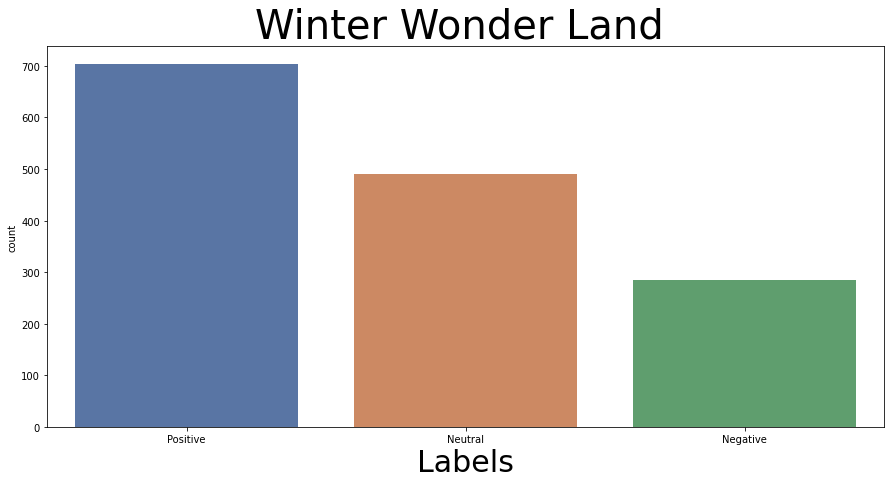

In [137]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged[merged.event=='winter_wonder_land'].label, palette="deep")

plt.title('Winter Wonder Land ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('winter_wonder_land.png')

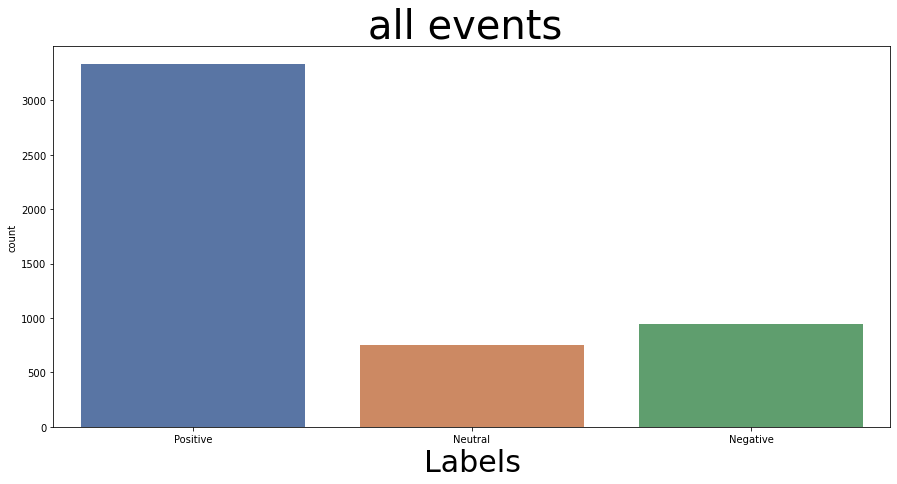

In [138]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(merged.label, palette='deep')
# event = 'سهم'
# event = arabic_reshaper.reshape(event)
# event = get_display(event)
plt.title('all events ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('events.png')

In [ ]:
wonder_land = utils.get_arabic_words(winter.text, handle_emojies='remove', remove_repeated_char=False)
wonder_land = ' '.join(wonder_land)

In [ ]:
# data = arabic_reshaper.reshape(wonder_land)
# data = get_display(data)
# wordcloud = WordCloud(background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [ ]:
# plt.figure(figsize = (15, 15)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.title('Word Cloud Winter Wonder Land event', fontsize=40)
# plt.axis("off") 
# plt.savefig('Word_Cloud_Winter_Wonder_Land.png')
# plt.show()

In [ ]:
shm_event = utils.get_arabic_words(shm.text, handle_emojies='remove', remove_repeated_char=False)
shm_event = ' '.join(shm_event)

In [ ]:
# data = arabic_reshaper.reshape(shm_event)
# data = get_display(data)
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [ ]:
# plt.figure(figsize = (15, 15)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.title('Word Cloud SHM event', fontsize=40)
# plt.tight_layout() 
# plt.savefig('Word_Cloud_SHM_Event.png')
# plt.show()

In [ ]:
bolivard_event = utils.get_arabic_words(bolivard.text, handle_emojies='remove', remove_repeated_char=False)
bolivard_event = ' '.join(bolivard_event)

In [ ]:
# data = arabic_reshaper.reshape(bolivard_event)
# data = get_display(data)
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [ ]:
# plt.figure(figsize = (15, 15)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.title('Word Cloud Carnival Boulevard', fontsize=40)
# plt.tight_layout() 
# plt.savefig('Word_Cloud_Carnival_Boulevard.png')
# plt.show()

## Model Experiments 
* Use tfidf
* Use countVect
* Use lightLem..
* Use POS Tagging ( Java, or C++)
* Experiemnt with different models.
<!-- * Use Word2Vec -->
 

In [378]:
from nltk.tokenize import word_tokenize
import nltk
# from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.pipeline import Pipeline
import gensim
from sklearn.manifold import TSNE

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
display(merged.head(2))

,date,event,fv_count,label,loca,rt-count,text,user-name
0,2019-10-26 20:13:28,winter_wonder_land,NaN,Positive,NaN,NaN,اجمل مكان رحت له للحين في موسم الرياض ونتر وند...,NaN
1,2019-10-26 20:12:23,winter_wonder_land,NaN,Neutral,NaN,NaN,متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...,NaN


In [ ]:
# store data as texts to

In [38]:
X = merged.drop(columns=['date', 'label', 'event', 'user-name', 'loca', 'fv_count', 'rt-count'])
y = np.array(merged['label']).reshape(-1, 1)
encoder = LabelEncoder().fit(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
la_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
la_mapping

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [40]:
y = encoder.transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y = y.reshape(-1, 1)

In [ ]:
# clean text
X = utils.get_arabic_words(X.text, handle_emojies='remove', remove_repeated_char=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [44]:
X_train.shape, y_train.shape

((3770,), (3770, 1))

In [ ]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [ ]:
def stem(text):
      stemer = ArabicLightStemmer()
      tokens = word_tokenize(text)
      tokens_ = [stemer.light_stem(word) for word in tokens]
      text_ = ' '.join(word for word in tokens_)
      return text_

In [ ]:
t = X_train.apply(stem)

In [ ]:
t

4538    شوف سناب يل سهم دموع ربع ربع لع حظ لع موقع زق ...
4194    حن سهم إتذكرين ضم ذكرى صدر غن طاح دموع سامحي ي...
1752                 رياض فن ابداع موسم رياض وليفارد رياض
445                          تر ندرلاند خت هل رياض خت روح
2275    لام علام بن از صف حال الآن مستع يستاهل رتوي صل...
                              ...                        
4426          له سهم سهم يستاهل ناس مبدع ساح فن طرب تشهدل
466       روح تر ندرلاند شف اسعار طلع ماتناسب طبقه متوسطه
3092       مسير موسم رياض هالابداع علم حلم موسم رياض طبيع
3772                       حس منقهر شف يل سهم مسو عني عاد
860                      خلاص راض سافر دو ملاه تر ندرلاند
Length: 3770, dtype: object

In [ ]:
word = 'يعقلون'
stemer = ArabicLightStemmer()
word_stem = stemer.light_stem(word)
print(word_stem)
print(tokenize(word))

عقل
False
['يعقلون']
False
['يعقلون']
ERROR! Session/line number was not unique in database. History logging moved to new session 69


In [ ]:
def build_model(model, use_tfidf=False):
    if use_tfidf: 
        steps = [
          ('tfidf', TfidfVectorizer()),
          ('spare_to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
          ('clf', model)
        ]    
        model = Pipeline(steps)
    else:
        steps = [
          ('Count', CountVectorizer()), 
          ('spare_to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
          ('clf', model)
        ]
        model = Pipeline(steps)
    return model

In [ ]:
def display_results(classiffier, y_test, y_pred):
    # labels = np.unique(y_pred)
    labels = encoder.classes_
    # confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_mat = plot_confusion_matrix(classiffier, X_test, y_test,
                                 display_labels=la_mapping.keys(),
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    print("Labels:", la_mapping)
    # print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print(report)

Labels: {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Accuracy: 0.6109785202863962
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       229
           1       0.26      0.41      0.32       193
           2       0.80      0.69      0.74       835

    accuracy                           0.61      1257
   macro avg       0.52      0.53      0.52      1257
weighted avg       0.66      0.61      0.63      1257



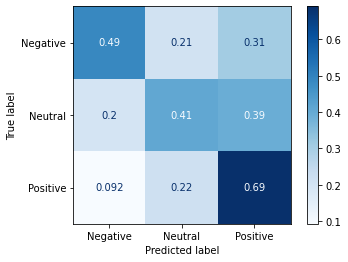

In [391]:
# Testing display
nb_vec =  build_model(OneVsRestClassifier(GaussianNB()), use_tfidf=True)
nb_vec.fit(X_train, y_train.ravel())
y_pred = np.array(nb_vec.predict(X_test)).reshape(-1, 1)
display_results(nb_vec, y_test, y_pred)


In [ ]:
# model without stem
nb_vec =  build_model(OneVsRestClassifier(GaussianNB()), use_tfidf=False)
nb_vec.fit(X_train, y_train.ravel())
nb_tfidf =  build_model(OneVsRestClassifier(GaussianNB()), use_tfidf=True)
nb_tfidf.fit(X_train, y_train.ravel())

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('spare_to_dense',
                 FunctionTransformer(accept_sparse=True, check_inverse=True,
                                     func=<function build_model.<locals>.<l

In [ ]:
# saving models
pickle.dump(nb_vec.steps[-1][-1], open('naive_bayes_vec_no_stem.sav', 'wb'))
pickle.dump(nb_tfidf.steps[-1][-1], open('naive_bayes_tfidf_no_stem.sav', 'wb'))

In [ ]:
# with stem
X_train_stem = X_train.apply(stem) 

In [ ]:
nb_vec_stem =  build_model(OneVsRestClassifier(GaussianNB()), use_tfidf=False)
nb_vec_stem.fit(X_train_stem, y_train.ravel())
nb_tfidf_stem =  build_model(OneVsRestClassifier(GaussianNB()), use_tfidf=True)
nb_tfidf_stem.fit(X_train_stem, y_train.ravel())

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('spare_to_dense',
                 FunctionTransformer(accept_sparse=True, check_inverse=True,
                                     func=<function build_model.<locals>.<l

In [ ]:
# saving models
pickle.dump(nb_vec_stem.steps[-1][-1], open('naive_bayes_vec_stem.sav', 'wb'))
pickle.dump(nb_tfidf_stem.steps[-1][-1], open('naive_bayes_tfidf_stem.sav', 'wb'))

In [ ]:
log_vec = build_model(OneVsRestClassifier(LogisticRegression(verbose=1)), use_tfidf=False)
log_vec.fit(X_train, y_train.ravel())
log_tfidf =  build_model(OneVsRestClassifier(LogisticRegression(verbose=1)), use_tfidf=True)
log_tfidf.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                              

In [ ]:
pickle.dump(log_vec.steps[-1][-1], open('logistic_vec_no_stem.sav', 'wb'))
pickle.dump(log_tfidf.steps[-1][-1], open('logistic_tfidf_no_stem.sav', 'wb'))

In [ ]:
log_vec_stem = build_model(OneVsRestClassifier(LogisticRegression(verbose=1)), use_tfidf=False)
log_vec_stem.fit(X_train_stem, y_train.ravel())
log_tfidf_stem =  build_model(OneVsRestClassifier(LogisticRegression(verbose=1)), use_tfidf=True)
log_tfidf_stem.fit(X_train_stem, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                              

In [ ]:
pickle.dump(log_vec_stem.steps[-1][-1], open('logistic_vec_stem.sav', 'wb'))
pickle.dump(log_tfidf_stem.steps[-1][-1], open('logistic_tfidf_stem.sav', 'wb'))

In [ ]:
knn_vec = build_model(OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1)), use_tfidf=False)
knn_vec.fit(X_train, y_train.ravel())
knn_tfidf =  build_model(OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1)), use_tfidf=True)
knn_tfidf.fit(X_train, y_train.ravel())

pickle.dump(knn_vec.steps[-1][-1], open('KNN_vec_no_stem.sav', 'wb'))
pickle.dump(knn_tfidf.steps[-1][-1], open('KNN_tfidf_no_stem.sav', 'wb'))

In [ ]:
knn_vec_stem = build_model(OneVsRestClassifier(OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1))), use_tfidf=False)
knn_vec_stem.fit(X_train_stem, y_train.ravel())
knn_tfidf_stem =  build_model(OneVsRestClassifier(OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1))), use_tfidf=True)
knn_tfidf_stem.fit(X_train_stem, y_train.ravel())

pickle.dump(knn_vec_stem.steps[-1][-1], open('KNN_vec_stem.sav', 'wb'))
pickle.dump(knn_tfidf_stem.steps[-1][-1], open('KNN_tfidf_stem.sav', 'wb'))

In [ ]:
svm_vec = build_model(OneVsRestClassifier(SVC(verbose=1)), use_tfidf=False)
svm_vec.fit(X_train, y_train.ravel())
svm_tfidf =  build_model(OneVsRestClassifier(SVC(verbose=1)), use_tfidf=True)
svm_tfidf.fit(X_train, y_train.ravel())

pickle.dump(svm_vec.steps[-1][-1], open('SVC_vec.sav', 'wb'))
pickle.dump(svm_tfidf.steps[-1][-1], open('SVC_tfidf.sav' , 'wb'))

In [ ]:
svm_vec_stem = build_model(OneVsRestClassifier(SVC(verbose=1)), use_tfidf=False)
svm_vec_stem.fit(X_train_stem, y_train.ravel())
svm_tfidf_stem =  build_model(OneVsRestClassifier(SVC(verbose=1)), use_tfidf=True)
svm_tfidf_stem.fit(X_train_stem, y_train.ravel())

pickle.dump(svm_vec_stem.steps[-1][-1], open('SVC_vec_stem.sav', 'wb'))
pickle.dump(svm_tfidf_stem.steps[-1][-1], open('SVC_tfidf_stem.sav', 'wb'))

In [ ]:
with open('/content/SVC_vec.sav', 'rb') as pickle_file:
    content = pickle.load(pickle_file)


In [ ]:
content[-1]

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=1),
                    n_jobs=None)

In [ ]:
# # modeling for each model.
# # benchamrk model

# bench_clf =  build_model(OneVsRestClassifier(GaussianNB()), use_tfidf=False)
# bench_clf.fit(X_train, y_train)
# bench_predictions = bench_clf.predict(X_test)
# display_results(y_test, bench_predictions)
# bench_predictions_proba = bench_clf.predict_proba(X_test)
# print(bench_predictions_proba)

Labels: {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Confusion Matrix:
 [[ 94  46  89]
 [ 28  51 114]
 [ 28  40 767]]
Accuracy: 0.7255369928400954
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       229
           1       0.37      0.26      0.31       193
           2       0.79      0.92      0.85       835

    accuracy                           0.73      1257
   macro avg       0.60      0.53      0.55      1257
weighted avg       0.70      0.73      0.70      1257

[[0.         0.         1.        ]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]
 ...
 [0.33333333 0.33333333 0.33333333]
 [0.         0.         1.        ]
 [0.33333333 0.33333333 0.33333333]]


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:376: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [ ]:
# log_clf = build_model(OneVsRestClassifier(LogisticRegression(verbose=1)), use_tfidf=False)
# log_clf.fit(X_train, y_train.ravel())
# log_predictions = log_clf.predict(X_test)
# display_results(y_test, log_predictions)
# log_predictions_proba = log_clf.predict_proba(X_test)
# print(log_predictions_proba)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


Labels: {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Confusion Matrix:
 [[104  16 109]
 [ 41  55  97]
 [ 15  29 791]]
Accuracy: 0.7557677008750995
              precision    recall  f1-score   support

           0       0.65      0.45      0.53       229
           1       0.55      0.28      0.38       193
           2       0.79      0.95      0.86       835

    accuracy                           0.76      1257
   macro avg       0.66      0.56      0.59      1257
weighted avg       0.73      0.76      0.73      1257

[[0.84470303 0.05139726 0.10389971]
 [0.20706067 0.02848593 0.7644534 ]
 [0.27166305 0.03341808 0.69491887]
 ...
 [0.3032464  0.46856319 0.22819041]
 [0.17203031 0.04500256 0.78296713]
 [0.0138154  0.0214952  0.9646894 ]]


In [ ]:
# SVC_clf = build_model(OneVsRestClassifier(SVC(verbose=-1)), use_tfidf=False)
# SVC_clf.fit(X_train, y_train.ravel())
# SVC_predictions = SVC_clf.predict(X_test)
# display_results(y_test, SVC_predictions)


Labels: {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Confusion Matrix:
 [[ 70  14 145]
 [ 25  34 134]
 [  7  13 815]]
Accuracy: 0.7311058074781225
              precision    recall  f1-score   support

           0       0.69      0.31      0.42       229
           1       0.56      0.18      0.27       193
           2       0.74      0.98      0.84       835

    accuracy                           0.73      1257
   macro avg       0.66      0.49      0.51      1257
weighted avg       0.71      0.73      0.68      1257



AttributeError: ignored

In [ ]:
# KNN_clf = build_model(OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1)), use_tfidf=True)
# KNN_clf.fit(X_train, y_train.ravel())
# KNN_predictions = KNN_clf.predict(X_test)
# display_results(y_test, KNN_predictions)
# KNN_predictions_proba = KNN_clf.predict_proba(X_test)
# print(KNN_predictions_proba)

Labels: {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Confusion Matrix:
 [[ 63  31 135]
 [ 16  55 122]
 [  2  20 813]]
Accuracy: 0.7406523468575974
              precision    recall  f1-score   support

           0       0.78      0.28      0.41       229
           1       0.52      0.28      0.37       193
           2       0.76      0.97      0.85       835

    accuracy                           0.74      1257
   macro avg       0.69      0.51      0.54      1257
weighted avg       0.73      0.74      0.70      1257

[[1.  0.  0. ]
 [0.2 0.2 0.6]
 [0.6 0.  0.4]
 ...
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]]


In [ ]:
# lexicon dict
def build_lex(data, n_gram=2):
  """
    data: tuple(pos_data, neg_data) passed data is expected to be a list of sentences.
  """
  assert n_gram >= 2, f'n_gram should be >1, passed {n_gram}'
  if not isinstance(data, tuple):
            raise ValueError('Inappropriate type: {} for data whereas a tuple of (pos_data, neg_data) \
            is expected'.format(type(data)))
  #   assert isinstane(dat, list), f'data should be of type list, passed {type(dat)}'
  pos_data, neg_data = data
  pos_grams = []
  for sentence in pos_data:
    sentence = sentence.split()
    pos_grams.append([sentence[i:i+n_gram] for i in range(len(sentence)-n_gram+1)])
  neg_grams = []
  for sentence in neg_data:
    sentence = sentence.split()
    neg_grams.append([sentence[i:i+n_gram] for i in range(len(sentence)-n_gram+1)])
  # flatting list of lists
  # reference: [https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists]
  from functools import reduce 
  pos_grams = reduce(lambda x,y: x+y, pos_grams)
  neg_grams = reduce(lambda x,y: x+y, neg_grams)
  pos_grams_ = []
  for GRAMS in pos_grams:
    pos_grams_.append(' '.join(gram for gram in GRAMS))
  neg_grams_ = []
  for GRAMS in neg_grams:
    neg_grams_.append(' '.join(gram for gram in GRAMS))
  # neg_lex = ngrams(neg.split(), n)
  return pos_grams_, neg_grams_

In [ ]:
pos_data = utils.get_arabic_words(merged[merged.label == 'Positive'].text, handle_emojies='emoticon')
neg_data = utils.get_arabic_words(merged[merged.label == 'Negative'].text, handle_emojies='emoticon')
pos_gram, neg_gram = build_lex(data=(pos_data, neg_data))

In [107]:
print(pos_gram[:3])
print()
print(neg_gram[:3])

['اجمل مكان', 'مكان رحت', 'رحت لحين']

['ماطلبنا مستحيل', 'مستحيل باذخ', 'باذخ ونتر']


In [ ]:
def lex_model(data, lexicon):
  """
  returns a list of lists: each list contains two tuples,
  the first element contains the text,postive probabilty, postive probabilty, neutral probabilty,
  count of [grams] in text, class name.
  the second element contains  label
  """
  if not isinstance(lexicon, tuple):
            raise ValueError('Inappropriate type: {} for lexicon whereas a tuple of (pos_gram, neg_gram) \
            is expected'.format(type(lexicon)))
  pos_gram, neg_gram = lexicon
  from functools import reduce 
  N_GRAM = len(pos_gram[0].split())
  grams = []
  
  for index, sentence in enumerate(data):
    sentence = sentence.split()
    grams_ = [sentence[i:i+N_GRAM] for i in range(len(sentence)-N_GRAM+1)]
    grams__ = []
    for gram_list in grams_:
      grams__.append(' '.join(word for word in gram_list))
    # check for postive, negative words for each sentences.
    pos_count, neg_count, neut_count = 0, 0, 0
    for GRAM in grams__:
      if GRAM in pos_gram:
        pos_count+=1
      if GRAM in neg_gram:
        neg_count+=1
      if (GRAM not in pos_gram) & (GRAM not in neg_gram):
        neut_count+=1
    total_grams=pos_count+neg_count+neut_count 
    pos_proba = pos_count/total_grams
    neg_proba = neg_count/total_grams
    neut_proba = neut_count/total_grams
    if (pos_proba > neg_proba) & (pos_proba > neut_proba):
      class_= 'Positive'
      label = 2
    elif (neg_proba > pos_proba) & (neg_proba > neut_proba):
      class_= 'Negative'
      label = 0
    else:
      class_= 'Neutral'
      label = 1
    grams.append([(grams__, pos_proba, neg_proba, neut_proba, total_grams, class_), (label)])
  return grams
  

In [ ]:
texts = utils.get_arabic_words(merged.text)

In [281]:
merged.text[:2]

0    اجمل مكان رحت له للحين في موسم الرياض ونتر وند...
1    متى يعقلون ذوولا ؟؟؟😂💔\n\n#ونتر_وندرلاند #وينت...
Name: text, dtype: object

In [ ]:
lex = lex_model(texts, (pos_gram, neg_gram))

In [308]:
print(la_mapping)
y

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


array([[2],
       [1],
       [1],
       ...,
       [2],
       [1],
       [1]])

In [354]:
lex[0]

[(['اجمل مكان',
   'مكان رحت',
   'رحت لحين',
   'لحين موسم',
   'موسم الرياض',
   'الرياض ونتر',
   'ونتر وندرلاند',
   'وندرلاند حلوه',
   'حلوه بشكل'],
  0.75,
  0.25,
  0.0,
  12,
  'Positive'),
 2]

In [353]:
len(lex), y.shape

(5027, (5027, 1))

In [ ]:
predictions = []
for element in lex:
    predictions.append(element[-1])
predictions = np.array(predictions).reshape(-1, 1)

In [358]:
predictions[:5]

array([[2],
       [1],
       [1],
       [1],
       [2]])

In [363]:
print(accuracy_score(y, predictions))
print(classification_report(y, predictions))
print(confusion_matrix(y, predictions))

0.9669783170877263
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       946
           1       0.92      0.85      0.88       751
           2       0.98      0.99      0.98      3330

    accuracy                           0.97      5027
   macro avg       0.96      0.94      0.95      5027
weighted avg       0.97      0.97      0.97      5027

[[ 928   18    0]
 [  31  637   83]
 [   0   34 3296]]


In [1]:
# from nltk import ngrams
# merged_grams = ngrams(utils.get_arabic_words(merged.text)[0].split(), 2)
# merged_grams

In [ ]:
# Word2Vec
# model = gensim.models.Word2Vec (X, size=150, window=10, min_count=2, workers=10)
# model.ww.similarity()

## Getting Experiemnatal Data

In [ ]:
# !GetOldTweets3 --querysearch "موسم الرياض" 

Saved 5500^C

Interrupted.


Done. Output file generated "output_got.csv".
